In [1]:
!pip3 install torch

In [0]:
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms, models
import matplotlib.pyplot as plt

In [0]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [4]:
torch.manual_seed(1)

In [5]:
!git clone https://github.com/jaddoescad/ants_and_bees.git

fatal: destination path 'ants_and_bees' already exists and is not an empty directory.


In [6]:
!ls ants_and_bees/train/ants

 0013035.jpg		     408393566_b5b694119b.jpg
 1030023514_aad5c608f9.jpg   424119020_6d57481dab.jpg
 1095476100_3906d8afde.jpg   424873399_47658a91fb.jpg
 1099452230_d1949d3250.jpg   450057712_771b3bfc91.jpg
 116570827_e9c126745d.jpg    45472593_bfd624f8dc.jpg
 1225872729_6f0856588f.jpg   459694881_ac657d3187.jpg
 1262877379_64fcada201.jpg   460372577_f2f6a8c9fc.jpg
 1269756697_0bce92cdab.jpg   460874319_0a45ab4d05.jpg
 1286984635_5119e80de1.jpg   466430434_4000737de9.jpg
 132478121_2a430adea2.jpg    470127037_513711fd21.jpg
 1360291657_dc248c5eea.jpg   474806473_ca6caab245.jpg
 1368913450_e146e2fb6d.jpg   475961153_b8c13fd405.jpg
 1473187633_63ccaacea6.jpg   484293231_e53cfc0c89.jpg
 148715752_302c84f5a4.jpg    49375974_e28ba6f17e.jpg
 1489674356_09d48dde0a.jpg   506249802_207cd979b4.jpg
 149244013_c529578289.jpg    506249836_717b73f540.jpg
 150801003_3390b73135.jpg    512164029_c0a66b8498.jpg
 150801171_cd86f17ed8.jpg    512863248_43c8ce579b.jpg
 154124431_65460430f2.jpg    518773929_7

In [0]:
transform_train = transforms.Compose([transforms.Resize((224, 224)),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.RandomAffine(0, shear=10, scale=(0.8, 1.2)),
                                      transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
                                      transforms.RandomRotation(10),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.5], [0.5])
                                     ])

transform_validation = transforms.Compose([transforms.Resize((224, 224)),
                                           transforms.ToTensor(),
                                           transforms.Normalize([0.5], [0.5])
                                          ])

training_dataset = datasets.ImageFolder(root='ants_and_bees/train', transform=transform_train)
training_loader = torch.utils.data.DataLoader(dataset=training_dataset, batch_size=100, shuffle=True) 
validation_dataset = datasets.ImageFolder(root='ants_and_bees/val', transform=transform_validation)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=100, shuffle=False) 

In [8]:
model = models.alexnet(pretrained=True)
model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace)
    (3): Dropout(p

In [0]:
for params in model.features.parameters():
  params.requires_grad = False

In [10]:
n_inputs = model.classifier[6].in_features
last_layer = nn.Linear(n_inputs, 2)
model.classifier[6] = last_layer
model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace)
    (3): Dropout(p

In [11]:
model.to(device)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace)
    (3): Dropout(p

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [15]:
epochs = 10
history=[]
val_history=[]
for e in range(epochs):
  current_loss = 0.0
  running_correct = 0.0
  validation_loss = 0.0
  validation_acc = 0.0
  for inputs, labels in training_loader:
    inputs = inputs.to(device)
    labels = labels.to(device)
    
#     inputs = inputs.view(inputs.shape[0], -1)   this is required is passing 1 dimensional input
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    _, preds = torch.max(outputs, 1)
    
    current_loss += loss.item()
    running_correct += torch.sum(preds == labels.data)

  else:
    with torch.no_grad():
      for val_inputs, val_labels in validation_loader:
        val_inputs = val_inputs.to(device)
        val_labels = val_labels.to(device)
        
#         val_inputs = val_inputs.view(val_inputs.shape[0], -1)
        val_output = model(val_inputs)
        val_loss = criterion(val_output, val_labels)
        
        _, val_preds = torch.max(val_output, 1)
        validation_loss += val_loss.item()
        validation_acc += torch.sum(val_preds == val_labels.data)
           
      epoch_loss = current_loss/(len(training_loader.dataset))
      epoch_acc = running_correct.float()/len(training_loader.dataset)
      validation_loss = validation_loss/(len(validation_loader.dataset))
      validation_acc = validation_acc.float()/len(validation_loader.dataset)
      history.append(epoch_loss)
      val_history.append(validation_loss)
      print('training loss: {:.4f}, training accuracy: {:.4f}, validation loss: {:.4f}, validation accuracy: {:.4f}'.format(epoch_loss, epoch_acc.item(), validation_loss, validation_acc.item()))
    
    

training loss: 0.0070, training accuracy: 0.6557, validation loss: 0.0057, validation accuracy: 0.7451
training loss: 0.0048, training accuracy: 0.7910, validation loss: 0.0083, validation accuracy: 0.7843
training loss: 0.0053, training accuracy: 0.8156, validation loss: 0.0042, validation accuracy: 0.8627
training loss: 0.0032, training accuracy: 0.8934, validation loss: 0.0040, validation accuracy: 0.8693
training loss: 0.0020, training accuracy: 0.9467, validation loss: 0.0058, validation accuracy: 0.8562
training loss: 0.0020, training accuracy: 0.9426, validation loss: 0.0034, validation accuracy: 0.9412
training loss: 0.0016, training accuracy: 0.9590, validation loss: 0.0037, validation accuracy: 0.9020
training loss: 0.0010, training accuracy: 0.9672, validation loss: 0.0048, validation accuracy: 0.9216
training loss: 0.0007, training accuracy: 0.9836, validation loss: 0.0044, validation accuracy: 0.9085
training loss: 0.0008, training accuracy: 0.9795, validation loss: 0.0043

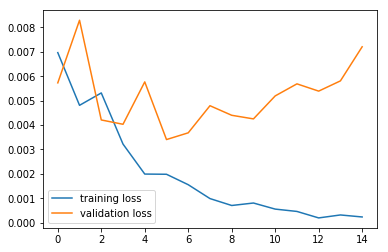

In [16]:
plt.plot(history, label="training loss")
plt.plot(val_history, label="validation loss")
plt.legend()